In [1]:
from PIL import Image
from scipy.ndimage import filters
import pandas as pd
import numpy as np
import os
import glob
import numpy as np
from keras.preprocessing import image
from keras.optimizers import Adam, RMSprop

Using TensorFlow backend.
C:\Users\suman\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
def cnn_model(path_loc):
    import tensorflow as tf
    import keras
    from keras.models import Sequential
    from keras.layers import Convolution2D
    from keras.layers import MaxPool2D
    from keras.layers import Flatten
    from keras.layers import Dense
    
    # Initializing CNN
        
    classifier = Sequential()
    
    # Step 1 : convolution
    classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

    # Step 2 : Pooling
    classifier.add(MaxPool2D(pool_size=(2,2)))

    # Adding second convolution layer.
    classifier.add(Convolution2D(32,3,3,activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2,2)))
        
    # step 3 : flattening
    classifier.add(Flatten())

    # step 4 : Full connection
    classifier.add(Dense(output_dim = 128, activation='relu')) 
    classifier.add(Dense(output_dim = 2, activation='softmax'))

    classifier.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

    # fitting CNN to the images

    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255, # image agumentation
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale=1./255) # test data don't need much image agumentation.
    import os

    os.chdir(path_loc) # train and test path location
    training_set = train_datagen.flow_from_directory('C:/Users/lokesh/project/brain_tumor_dataset/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

    test_set = test_datagen.flow_from_directory('C:/Users/lokesh/project/brain_tumor_dataset/testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                           class_mode = 'categorical')

    # buliding model and performing model validation simultaneously
    history = classifier.fit_generator(training_set,
                         steps_per_epoch = 40, # number of images to be taken from training data set. 
                         nb_epoch = 20, 
                         validation_data = test_set,
                         validation_steps = 10,
                         verbose = 1) # number of images to be taken from test data set.

    return (classifier, history)




In [3]:
classifier, history = cnn_model('C:/Users/lokesh/project/brain_tumor_dataset')


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  from ipykernel import kernelapp as app
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=40, validation_data=<keras_pre..., validation_steps=10, verbose=1, epochs=20)`


Epoch 1/20
40/40 [==============================] - 9s 229ms/step - loss: 0.5735 - acc: 0.7008 - val_loss: 0.4816 - val_acc: 0.7600
Epoch 2/20
40/40 [==============================] - 7s 179ms/step - loss: 0.4678 - acc: 0.7943 - val_loss: 0.6347 - val_acc: 0.7200
Epoch 3/20
40/40 [==============================] - 7s 183ms/step - loss: 0.3907 - acc: 0.8344 - val_loss: 0.6630 - val_acc: 0.6800
Epoch 4/20
40/40 [==============================] - 7s 185ms/step - loss: 0.3224 - acc: 0.8675 - val_loss: 0.5471 - val_acc: 0.7000
Epoch 5/20
40/40 [==============================] - 7s 181ms/step - loss: 0.2905 - acc: 0.8763 - val_loss: 0.7919 - val_acc: 0.6400
Epoch 6/20
40/40 [==============================] - 7s 178ms/step - loss: 0.2278 - acc: 0.9160 - val_loss: 0.6287 - val_acc: 0.7400
Epoch 7/20
40/40 [==============================] - 7s 181ms/step - loss: 0.1805 - acc: 0.9331 - val_loss: 0.7590 - val_acc: 0.7800
Epoch 8/20
40/40 [==============================] - 7s 182ms/step - loss: 0.

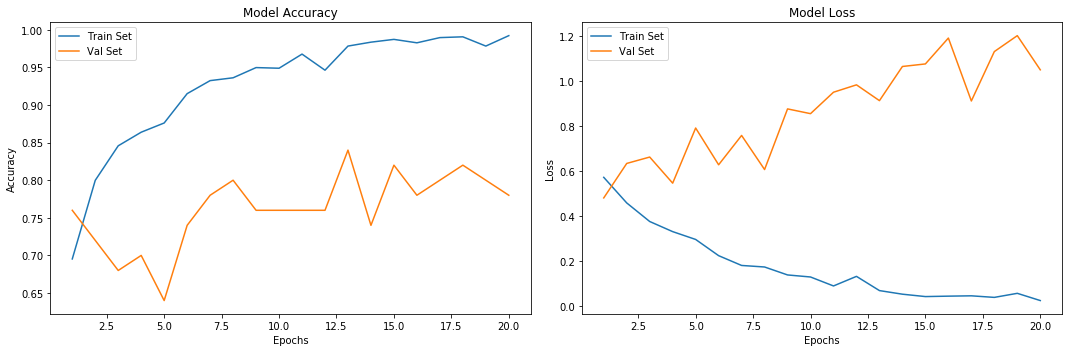

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [6]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")

In [7]:
#Testing one sample here

from keras.models import model_from_json

%matplotlib inline
test_image = image.load_img('C:/Users/lokesh/project/brain_tumor_dataset/testing/no/no 95.jpg', target_size = (64, 64))
test_image

test_image = image.img_to_array(test_image)
test_image
np.shape(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image
np.shape(test_image)

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model

loaded_model.load_weights("model.h5")


label = loaded_model.predict_classes(test_image)
label

array([0], dtype=int64)